<a href="https://colab.research.google.com/github/AI-Enthusiast/18650-Accelerated-Battery-Life-Testing/blob/main/recommissioned_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import os

os.listdir('/content/drive/My Drive/')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/'

In [7]:
#file_path = '/content/drive/My Drive/recommissioned.csv'
file_path = 'recommissioned.csv'

In [8]:
import pandas as pd

#load the csv
recomissioned = pd.read_csv(file_path)

#display first few rows
recomissioned.head()

,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode
0,0,1,7.194868,25.172260,2.519789,3512.381,1
1,1,2,6.562608,53.412762,16.182695,544.272,1
2,2,3,6.541545,53.812033,16.206786,544.297,1
3,3,4,6.556053,54.501738,16.211122,544.399,1
4,4,5,6.553968,54.614059,16.214696,545.901,1


In [9]:
#check format
sample_df = pd.read_csv(file_path, nrows=10)
print(sample_df)

   Unnamed: 0  dischargePhase  voltage_charger  temperature_battery  \
0           0               1         7.194868            25.172260   
1           1               2         6.562608            53.412762   
2           2               3         6.541545            53.812033   
3           3               4         6.556053            54.501738   
4           4               5         6.553968            54.614059   
5           5               6         6.554037            54.739557   
6           6               7         6.545936            54.617007   
7           7               8         6.544629            54.594782   
8           8               9         6.542049            54.577676   
9           9              10         6.517904            53.245880   

   current_load  time_end  mode  
0      2.519789  3512.381     1  
1     16.182695   544.272     1  
2     16.206786   544.297     1  
3     16.211122   544.399     1  
4     16.214696   545.901     1  
5     16.21788

In [10]:
#checking columsn and data types
recomissioned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3626 entries, 0 to 3625
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3626 non-null   int64  
 1   dischargePhase       3626 non-null   int64  
 2   voltage_charger      3626 non-null   float64
 3   temperature_battery  3626 non-null   float64
 4   current_load         3626 non-null   float64
 5   time_end             3626 non-null   float64
 6   mode                 3626 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 198.4 KB


In [22]:
#checking for missing or null values
recomissioned.isnull().sum()



Unnamed: 0               0
dischargePhase           0
voltage_charger          0
temperature_battery      0
current_load             0
time_end                 0
mode                     0
arrhenius_temperature    0
log_voltage              1
temp_volt                1
dtype: int64

In [23]:
# Assuming df is your DataFrame
recomissioned = recomissioned.dropna(subset=['log_voltage'])

In [13]:
import numpy as np

#adding arrhenius temperature column
recomissioned['arrhenius_temperature'] = 11605/(recomissioned['temperature_battery'] + 273.15)

#adding log voltage columns
recomissioned['log_voltage'] = np.log10(recomissioned['voltage_charger'])

#display first few rows
recomissioned.head()

c:\Users\tyler\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode,arrhenius_temperature,log_voltage
0,0,1,7.194868,25.172260,2.519789,3512.381,1,38.900885,0.857023
1,1,2,6.562608,53.412762,16.182695,544.272,1,35.536814,0.817076
2,2,3,6.541545,53.812033,16.206786,544.297,1,35.493418,0.815680
3,3,4,6.556053,54.501738,16.211122,544.399,1,35.418704,0.816642
4,4,5,6.553968,54.614059,16.214696,545.901,1,35.406567,0.816504


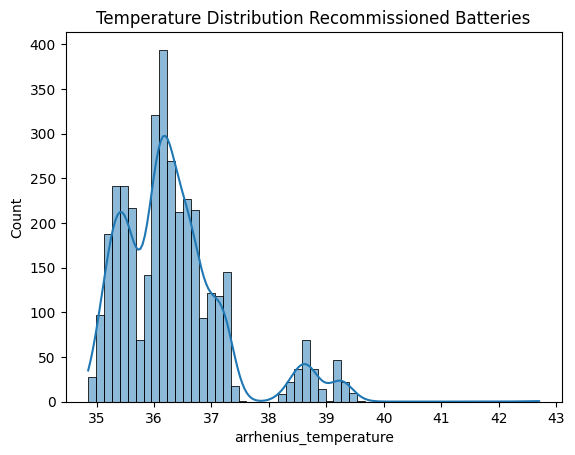

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#distribution of temperature
sns.histplot(recomissioned['arrhenius_temperature'], kde=True)
plt.title('Temperature Distribution Recommissioned Batteries')
plt.show()

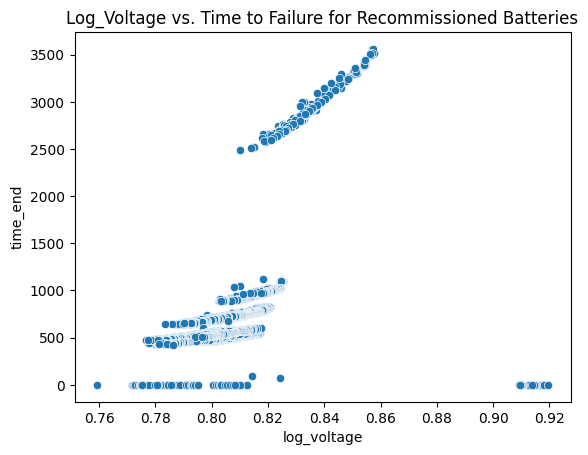

In [15]:
#relationship between log_voltage and time to failure
sns.scatterplot(x='log_voltage', y='time_end', data=recomissioned)
plt.title('Log_Voltage vs. Time to Failure for Recommissioned Batteries')
plt.show()

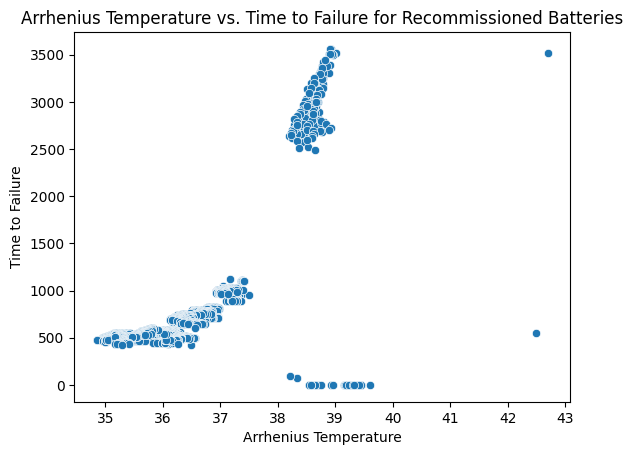

In [16]:
#relationship between arrhenius temp and time_end
sns.scatterplot(x='arrhenius_temperature', y='time_end', data=recomissioned)
plt.title('Arrhenius Temperature vs. Time to Failure for Recommissioned Batteries')
plt.xlabel('Arrhenius Temperature')
plt.ylabel('Time to Failure')
plt.show()

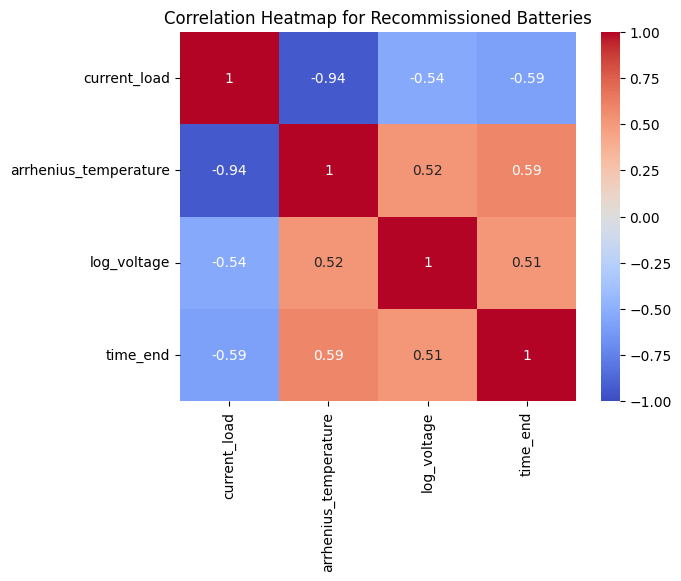

In [17]:
#correlation heatmap
corr = recomissioned[['current_load','arrhenius_temperature','log_voltage','time_end']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Recommissioned Batteries')
plt.show()

In [19]:
import plotly.graph_objs as go
import plotly.express as px

#creating a 3d scatter plot
fig = px.scatter_3d(
    recomissioned,
    x ='current_load',
    y ='arrhenius_temperature',
    z ='time_end',
    color='log_voltage',
    labels={'current_load': 'Current Load',
            'arrhenius_temperature' : 'Arrhenius Temperature',
            'time_end' : 'Time to Failure'} ,
    title = '3D Scatter Plot: Current Load, Arrhenius Temperature, and Time to Failure'
)

#updating the layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Current Load',
        yaxis_title='Arrhenius Temperature Battery',
        zaxis_title='Time to Failure'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

#show the plot
fig.show()

In [20]:
#calculating temp_volt
recomissioned['temp_volt'] = recomissioned['arrhenius_temperature'] * recomissioned['log_voltage']

#check first few rows
recomissioned.head()


,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode,arrhenius_temperature,log_voltage,temp_volt
0,0,1,7.194868,25.172260,2.519789,3512.381,1,38.900885,0.857023,33.338946
1,1,2,6.562608,53.412762,16.182695,544.272,1,35.536814,0.817076,29.036293
2,2,3,6.541545,53.812033,16.206786,544.297,1,35.493418,0.815680,28.951284
3,3,4,6.556053,54.501738,16.211122,544.399,1,35.418704,0.816642,28.924418
4,4,5,6.553968,54.614059,16.214696,545.901,1,35.406567,0.816504,28.909615


In [28]:
recomissioned = recomissioned[recomissioned['temperature_battery'] > 0]
recomissioned = recomissioned[recomissioned['time_end'] > 10]

In [31]:
#Linear Regressions Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#splitting data into feature and target
X = recomissioned[['arrhenius_temperature' , 'log_voltage' , 'current_load' , 'temp_volt']]
y = recomissioned['time_end']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#predictions
y_pred = lr_model.predict(X_test)

#evaluations
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
rss = np.sum((y_test-y_pred)**2)
k = X_train.shape[1] + 1
aic = n * np.log(rss / n) +2 * k
print(f'Mean Square Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'AIC Score: {aic}')

Mean Square Error: 24317.72835477929
R^2 Score: 0.9165743515171063
AIC Score: 7149.965374153716


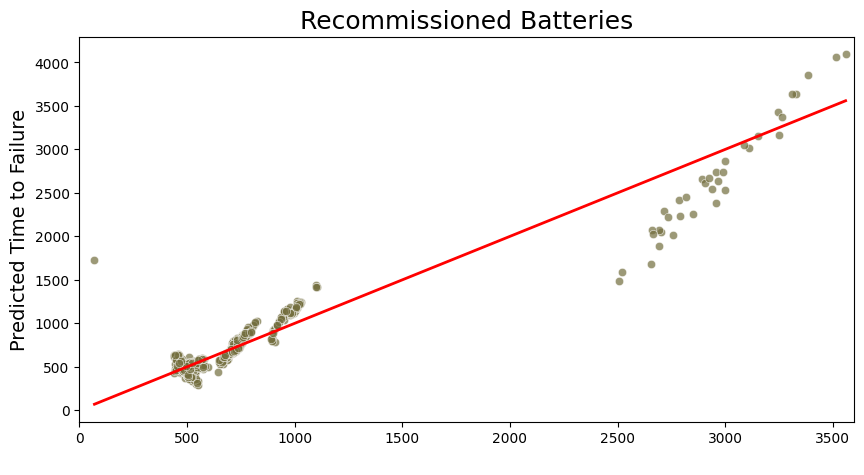

In [40]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred, color='#736e3e',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# Plot details
plt.xlabel(' ')
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Recommissioned Batteries',fontsize = 18)
plt.xlim(0,3600)

# Show plot
plt.show()

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#predictions
y_pred_rf = rf_model.predict(X_test)

#evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
n = len(y_test)
rss = np.sum((y_test-y_pred_rf)**2)
k = X_train.shape[1] + 1
aic_rf = n * np.log(rss / n) +2 * k
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - AIC Score: {aic_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 5115.1337108441185
Random Forest - AIC Score: 6047.750885012886
Random Forest - R^2 Score: 0.9824517594456962


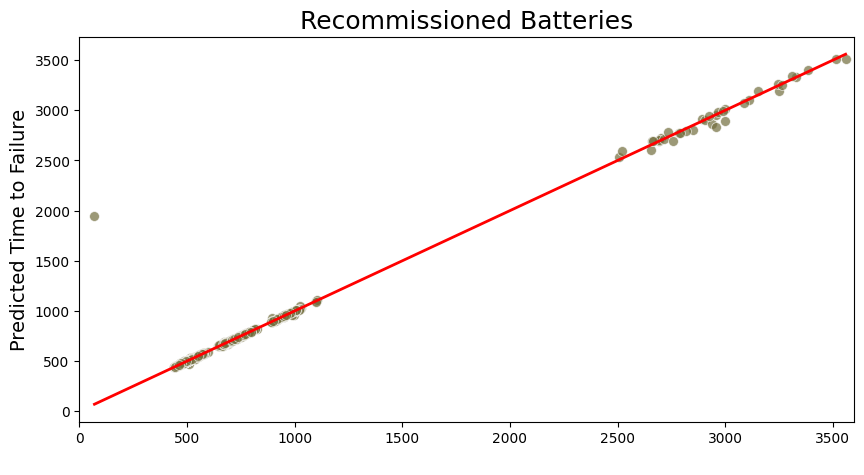

In [49]:

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred_rf, color='#736e3e',alpha=0.7,s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# Plot details
plt.xlabel(' ')
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Recommissioned Batteries',fontsize = 18)
plt.xlim(0,3600)

# Show plot
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred, color='#736e3e',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# Plot details
plt.xlabel(' ')
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Recommissioned Batteries',fontsize = 18)
plt.xlim(0,3600)

# Show plot
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [51]:
# Select Relevant Features and target variable
X = recomissioned[['arrhenius_temperature' , 'log_voltage', 'current_load' , 'time_end']]
y = recomissioned['time_end']

In [52]:
#split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
#Define the FNN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

c:\Users\tyler\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [54]:
#compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [55]:
#training the model
history = model.fit(X_train_scaled,  y_train, validation_split=0.2, epochs = 50, batch_size=32)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 834724.5000 - mae: 736.5327 - val_loss: 762219.7500 - val_mae: 681.8477
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 486531.5938 - mae: 514.0642 - val_loss: 23130.6523 - val_mae: 125.8107
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27204.3086 - mae: 130.7397 - val_loss: 15359.8271 - val_mae: 104.8207
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19803.3750 - mae: 110.6613 - val_loss: 10637.1240 - val_mae: 84.8557
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17172.3691 - mae: 98.2107 - val_loss: 8236.5234 - val_mae: 73.3880
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14509.0459 - mae: 87.7522 - val_loss: 6718.9219 - val_mae: 65.2667
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16343.8857 - mae: 88.4434 - val_loss: 5363.6948 - val_mae: 58.5546
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13213.2432 - mae: 79.0313 - val_loss: 6242.7075 - val

In [57]:
#evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1146.3793 - mae: 13.4066
Test Loss: 941.6327514648438
Test MAE: 13.11618423461914


<function matplotlib.pyplot.show(close=None, block=None)>

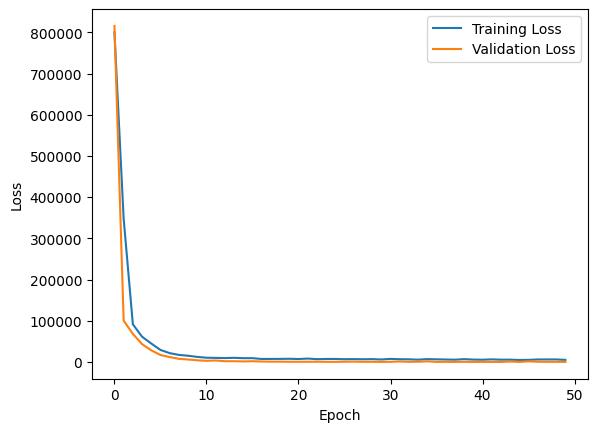

In [66]:
import matplotlib.pyplot as plt

#plotting the trianing history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

In [67]:
#making predictions
y_pred = model.predict(X_test_scaled)

#displaying predictions vs actual values
for i in range(10):
  print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted: [490.09766], Actual: 494.5859999998938
Predicted: [671.4206], Actual: 674.5779999997467
Predicted: [483.18536], Actual: 491.58700000005774
Predicted: [670.73663], Actual: 675.9010000000708
Predicted: [783.81384], Actual: 784.0709999999963
Predicted: [457.06866], Actual: 454.1710000000894
Predicted: [543.7024], Actual: 553.0509999999776
Predicted: [917.273], Actual: 913.344999999972
Predicted: [514.1011], Actual: 518.5160000000033
Predicted: [491.00693], Actual: 489.69999999995343
